In [71]:
#install libraries
!pip3 install geopandas
!pip3 install scikit-learn
!pip3 install matplotlib
!pip3 install numpy
!pip3 install pandas




In [72]:
from google.colab import drive, files
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import os
import pandas as pd
import geopandas as gpd

natural_earth_folder_path = '/content/drive/My Drive/natural_earth_vector/10m_cultural/'

economic_data_folder_path = '/content/drive/My Drive/archive'

In [74]:
#CSV files in economic data folder
csv_files = [os.path.join(economic_data_folder_path, f) for f in os.listdir(economic_data_folder_path) if f.endswith('.csv')]

for file in csv_files:
    df = pd.read_csv(file)
    print(df.columns)

Index(['country', 'annual_income', 'corruption_index'], dtype='object')
Index(['country', 'unemployment_rate'], dtype='object')
Index(['country', 'gdp_per_capita'], dtype='object')
Index(['country', 'tourists_in_millions', 'receipts_in_billions',
       'receipts_per_tourist', 'percentage_of_gdp'],
      dtype='object')
Index(['country', 'cost_index', 'monthly_income', 'purchasing_power_index'], dtype='object')


In [75]:
import os

# List all files sizes
for csv_file in csv_files:
    file_size = os.path.getsize(csv_file)
    print(f"{csv_file}: {file_size} bytes")

    # Print
    with open(csv_file, 'r') as file:
        print(file.readline())
        print(file.readline())

/content/drive/My Drive/archive/corruption.csv: 1938 bytes
country,annual_income,corruption_index

Denmark,68110,12

/content/drive/My Drive/archive/unemployment.csv: 883 bytes
country,unemployment_rate

Marshall Islands,36.0

/content/drive/My Drive/archive/richest_countries.csv: 746 bytes
country,gdp_per_capita

Luxembourg,134754

/content/drive/My Drive/archive/tourism.csv: 1207 bytes
country,tourists_in_millions,receipts_in_billions,receipts_per_tourist,percentage_of_gdp

France,117.1,35.96,307,1.2

/content/drive/My Drive/archive/cost_of_living.csv: 2603 bytes
country,cost_index,monthly_income,purchasing_power_index

Bermuda,157.6,9712,105



In [76]:
# Check problematic files
problematic_files = [
    '/content/drive/My Drive/archive/unemployment.csv',
    '/content/drive/My Drive/archive/richest_countries.csv',
    '/content/drive/My Drive/archive/tourism.csv',
    '/content/drive/My Drive/archive/cost_of_living.csv'
]

for file in problematic_files:
    try:
        df = pd.read_csv(file)
        print(f"File: {file}")
        print(df.head())
    except Exception as e:
        print(f"Error reading {file}: {e}")

File: /content/drive/My Drive/archive/unemployment.csv
            country  unemployment_rate
0  Marshall Islands               36.0
1      South Africa               33.6
2          Kiribati               30.6
3            Kosovo               30.5
4    American Samoa               29.8
File: /content/drive/My Drive/archive/richest_countries.csv
      country  gdp_per_capita
0  Luxembourg          134754
1   Singapore          116486
2     Ireland          106456
3       Qatar           93521
4     Bermuda           85192
File: /content/drive/My Drive/archive/tourism.csv
         country  tourists_in_millions  receipts_in_billions  \
0         France                 117.1                 35.96   
1         Mexico                  51.1                 11.45   
2  United States                  45.0                 84.21   
3          Italy                  38.4                 20.46   
4        Hungary                  31.6                  4.22   

   receipts_per_tourist  percentage_

In [77]:
import pandas as pd

# Paths to the CSV files
csv_files = {
    'corruption': '/content/drive/My Drive/archive/corruption.csv',
    'unemployment': '/content/drive/My Drive/archive/unemployment.csv',
    'richest_countries': '/content/drive/My Drive/archive/richest_countries.csv',
    'tourism': '/content/drive/My Drive/archive/tourism.csv',
    'cost_of_living': '/content/drive/My Drive/archive/cost_of_living.csv'
}

# Load CSV files into DataFrame
dataframes = {}
for key, path in csv_files.items():
    try:
        df = pd.read_csv(path, encoding='utf-8')
        dataframes[key] = df
        print(f"Loaded {key} DataFrame:")
        print(df.head())
    except Exception as e:
        print(f"Error reading {path}: {e}")

Loaded corruption DataFrame:
       country  annual_income  corruption_index
0      Denmark          68110                12
1      Finland          53660                12
2  New Zealand          45340                12
3       Norway          84090                15
4    Singapore          64010                15
Loaded unemployment DataFrame:
            country  unemployment_rate
0  Marshall Islands               36.0
1      South Africa               33.6
2          Kiribati               30.6
3            Kosovo               30.5
4    American Samoa               29.8
Loaded richest_countries DataFrame:
      country  gdp_per_capita
0  Luxembourg          134754
1   Singapore          116486
2     Ireland          106456
3       Qatar           93521
4     Bermuda           85192
Loaded tourism DataFrame:
         country  tourists_in_millions  receipts_in_billions  \
0         France                 117.1                 35.96   
1         Mexico                  51.1          

In [78]:
# Combine DataFrames on 'country'
combined_economic_df = dataframes['corruption'] \
    .merge(dataframes['unemployment'], on='country', how='left') \
    .merge(dataframes['richest_countries'], on='country', how='left') \
    .merge(dataframes['tourism'], on='country', how='left') \
    .merge(dataframes['cost_of_living'], on='country', how='left')

print("Combined DataFrame:")
print(combined_economic_df.head())

Combined DataFrame:
       country  annual_income  corruption_index  unemployment_rate  \
0      Denmark          68110                12                4.8   
1      Finland          53660                12                NaN   
2  New Zealand          45340                12                NaN   
3       Norway          84090                15                5.0   
4    Singapore          64010                15                3.6   

   gdp_per_capita  tourists_in_millions  receipts_in_billions  \
0         64651.0                   NaN                   NaN   
1         55007.0                   NaN                   NaN   
2         46420.0                   NaN                   NaN   
3         79201.0                   1.4                   2.2   
4        116486.0                   NaN                   NaN   

   receipts_per_tourist  percentage_of_gdp  cost_index  monthly_income  \
0                   NaN                NaN       119.9          5676.0   
1                   

In [79]:
print(combined_economic_df.info())
print(combined_economic_df.describe())
print(combined_economic_df['country'].unique())  # List unique countries to verify consistency

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 110 non-null    object 
 1   annual_income           110 non-null    int64  
 2   corruption_index        110 non-null    int64  
 3   unemployment_rate       50 non-null     float64
 4   gdp_per_capita          34 non-null     float64
 5   tourists_in_millions    28 non-null     float64
 6   receipts_in_billions    28 non-null     float64
 7   receipts_per_tourist    28 non-null     float64
 8   percentage_of_gdp       28 non-null     float64
 9   cost_index              71 non-null     float64
 10  monthly_income          71 non-null     float64
 11  purchasing_power_index  71 non-null     float64
dtypes: float64(9), int64(2), object(1)
memory usage: 10.4+ KB
None
       annual_income  corruption_index  unemployment_rate  gdp_per_capita  \
count   

In [80]:
# Function to get all shapefiles in the folder
def list_shapefiles(folder_path):
    shapefiles = []
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.shp'):
                base_name = os.path.splitext(file)[0]
                files_needed = [f"{base_name}.shp", f"{base_name}.shx", f"{base_name}.dbf"]
                if all(needed_file in files for needed_file in files_needed):
                    shapefiles.append(os.path.join(root, file))
                else:
                    missing_files = [needed_file for needed_file in files_needed if needed_file not in files]
                    print(f"Skipping {file} due to missing files: {', '.join(missing_files)}")
    return shapefiles

# Get all shapefile paths
shapefile_paths = list_shapefiles(natural_earth_folder_path)

# Load all shapefiles into GeoDataFrames
gdf_list = []
for shapefile_path in shapefile_paths:
    try: #handle potential errors
        gdf = gpd.read_file(shapefile_path)
        gdf_list.append(gdf)
    except Exception as e: # Catch any exceptions during file reading
        print(f"Error reading {shapefile_path}: {e}")

# Combine all GeoDataFrames into a single GeoDataFrame
if gdf_list:
    combined_gdf = gpd.GeoDataFrame(pd.concat(gdf_list, ignore_index=True))
    print(combined_gdf.head())
else:
    print("No shapefiles found in the directory.")

   name_conve  max_pop_al  max_pop_20  max_pop_50  max_pop_30  max_pop_31  \
0     Aalborg    101616.0    101616.0         0.0         0.0         0.0   
1      Aarhus    227100.0    227100.0         0.0         0.0         0.0   
2         Aba    851210.0    851210.0         0.0         0.0         0.0   
3      Abadan    260078.0    260078.0         0.0         0.0         0.0   
4  Abaetetuba     79420.0     79420.0         0.0         0.0         0.0   

   max_natsca  min_areakm  max_areakm  min_areami  ...  sov0name  adm0name  \
0        20.0        76.0        76.0        29.0  ...       NaN       NaN   
1        20.0       131.0       131.0        51.0  ...       NaN       NaN   
2        20.0       278.0       278.0       108.0  ...       NaN       NaN   
3        20.0        44.0        44.0        17.0  ...       NaN       NaN   
4        20.0        10.0        10.0         4.0  ...       NaN       NaN   

   adm1name  pop_max  pop_min  pop_other  rank_max  rank_min  megana

In [81]:
# Display the first few rows of combined_gdf
print("Combined GeoDataFrame:")
print(combined_gdf.head())

# Display the first few rows of combined_economic_df
print("Combined Economic DataFrame:")
print(combined_economic_df.head())

# Summary statistics
print("Combined GeoDataFrame Description:")
print(combined_gdf.describe())

print("Combined Economic DataFrame Description:")
print(combined_economic_df.describe())

Combined GeoDataFrame:
   name_conve  max_pop_al  max_pop_20  max_pop_50  max_pop_30  max_pop_31  \
0     Aalborg    101616.0    101616.0         0.0         0.0         0.0   
1      Aarhus    227100.0    227100.0         0.0         0.0         0.0   
2         Aba    851210.0    851210.0         0.0         0.0         0.0   
3      Abadan    260078.0    260078.0         0.0         0.0         0.0   
4  Abaetetuba     79420.0     79420.0         0.0         0.0         0.0   

   max_natsca  min_areakm  max_areakm  min_areami  ...  sov0name  adm0name  \
0        20.0        76.0        76.0        29.0  ...       NaN       NaN   
1        20.0       131.0       131.0        51.0  ...       NaN       NaN   
2        20.0       278.0       278.0       108.0  ...       NaN       NaN   
3        20.0        44.0        44.0        17.0  ...       NaN       NaN   
4        20.0        10.0        10.0         4.0  ...       NaN       NaN   

   adm1name  pop_max  pop_min  pop_other  ran

In [82]:
# Check for missing values in combined_gdf
print("Missing values in combined_gdf:")
print(combined_gdf.isnull().sum())

# Check for missing values in combined_economic_df
print("Missing values in combined_economic_df:")
print(combined_economic_df.isnull().sum())

Missing values in combined_gdf:
name_conve    278715
max_pop_al    278715
max_pop_20    278715
max_pop_50    278715
max_pop_30    278715
               ...  
pop_other     277392
rank_max      277391
rank_min      277391
meganame      284142
ls_name       278147
Length: 487, dtype: int64
Missing values in combined_economic_df:
country                    0
annual_income              0
corruption_index           0
unemployment_rate         60
gdp_per_capita            76
tourists_in_millions      82
receipts_in_billions      82
receipts_per_tourist      82
percentage_of_gdp         82
cost_index                39
monthly_income            39
purchasing_power_index    39
dtype: int64


In [83]:
import numpy as np

In [84]:
'''# Example of cleaning combined_economic_df
combined_economic_df= combined_economic_df.dropna()  # Remove rows with missing values
# You can add more cleaning steps here as needed

print("Cleaned Combined Economic DataFrame:")
print(combined_economic_df.head())'''

'# Example of cleaning combined_economic_df\ncombined_economic_df= combined_economic_df.dropna()  # Remove rows with missing values\n# You can add more cleaning steps here as needed\n\nprint("Cleaned Combined Economic DataFrame:")\nprint(combined_economic_df.head())'

In [85]:
# Fill missing values in combined_economic_df with mean
numeric_cols_economic = combined_economic_df.select_dtypes(include=['float64', 'int64']).columns
combined_economic_df[numeric_cols_economic] = combined_economic_df[numeric_cols_economic].fillna(combined_economic_df[numeric_cols_economic].mean())

# Fill categorical columns with 'Unknown' (if applicable)
categorical_cols_economic = combined_economic_df.select_dtypes(include=['object']).columns
combined_economic_df[categorical_cols_economic] = combined_economic_df[categorical_cols_economic].fillna('Unknown')

# Separate numeric and non-numeric columns in combined_economic_df
numeric_cols = combined_economic_df.select_dtypes(include='number').columns
non_numeric_cols = combined_economic_df.select_dtypes(exclude='number').columns

# Exclude 'country' from non-numeric columns for special handling
non_numeric_cols = non_numeric_cols[non_numeric_cols != 'country']

# Fill missing numerical columns with their mean (consider NaN means)
combined_economic_df[numeric_cols] = combined_economic_df[numeric_cols].apply(lambda col: col.fillna(col.mean()) if col.mean() is not np.nan else col.fillna(0))

# Fill missing non-numerical columns with 'Unknown', except 'country'
combined_economic_df[non_numeric_cols] = combined_economic_df[non_numeric_cols].fillna('Unknown')

# Ensure 'country' is not filled with 'Unknown'
combined_economic_df['country'] = combined_economic_df['country'].fillna('Unknown')

# Check for remaining missing values
print(combined_economic_df.isnull().sum())
print(combined_economic_df.head())

country                   0
annual_income             0
corruption_index          0
unemployment_rate         0
gdp_per_capita            0
tourists_in_millions      0
receipts_in_billions      0
receipts_per_tourist      0
percentage_of_gdp         0
cost_index                0
monthly_income            0
purchasing_power_index    0
dtype: int64
       country  annual_income  corruption_index  unemployment_rate  \
0      Denmark          68110                12              4.800   
1      Finland          53660                12              7.024   
2  New Zealand          45340                12              7.024   
3       Norway          84090                15              5.000   
4    Singapore          64010                15              3.600   

   gdp_per_capita  tourists_in_millions  receipts_in_billions  \
0         64651.0             13.317857             15.228214   
1         55007.0             13.317857             15.228214   
2         46420.0             13.31

In [86]:
# Convert country names to lowercase and strip spaces for consistency between DataFrames
combined_gdf['country'] = combined_gdf['country'].str.lower().str.strip()
combined_economic_df['country'] = combined_economic_df['country'].str.lower().str.strip()

In [87]:
# Create a mapping dictionary for specific country name adjustments
name_mapping = {
    'united states': 'united states',
    'united kingdom': 'united kingdom',
    'canada': 'canada',
    'mexico': 'mexico',
    'belize': 'belize',
    'hong kong': 'hong kong'
    # Add other mappings as needed
}

# Apply the mapping to the country columns
combined_gdf['country'] = combined_gdf['country'].replace(name_mapping)
combined_economic_df['country'] = combined_economic_df['country'].replace(name_mapping)

In [88]:
# Drop rows with NaN values in 'country' column
combined_gdf = combined_gdf.dropna(subset=['country'])
combined_economic_df = combined_economic_df.dropna(subset=['country'])

In [89]:
# Find unmatched countries in GeoDataFrame
geo_countries = set(combined_gdf['country'].unique())
eco_countries = set(combined_economic_df['country'].unique())

print("Countries in GeoDataFrame not in Economic DataFrame:")
print(geo_countries - eco_countries)

print("Countries in Economic DataFrame not in GeoDataFrame:")
print(eco_countries - geo_countries)

Countries in GeoDataFrame not in Economic DataFrame:
{'belize'}
Countries in Economic DataFrame not in GeoDataFrame:
{'uzbekistan', 'egypt', 'azerbaijan', 'france', 'turkey', 'qatar', 'philippines', 'burundi', 'south korea', 'netherlands', 'mali', 'russia', 'japan', 'niger', 'bolivia', 'finland', 'liberia', 'argentina', 'sierra leone', 'zimbabwe', 'somalia', 'lebanon', 'ireland', 'central africa', 'sweden', 'djibouti', 'hong kong', 'honduras', 'turkmenistan', 'yemen', 'eswatini', 'chad', 'sudan', 'dominican republic', 'china', 'laos', 'congo', 'nigeria', 'romania', 'switzerland', 'venezuela', 'israel', 'tajikistan', 'el salvador', 'poland', 'nicaragua', 'south africa', 'papua new guinea', 'gabon', 'sri lanka', 'togo', 'kyrgyzstan', 'cameroon', 'brazil', 'vietnam', 'south sudan', 'greece', 'nepal', 'luxembourg', 'bangladesh', 'pakistan', 'angola', 'libya', 'syria', 'italy', 'mauritania', 'eritrea', 'new zealand', 'denmark', 'united kingdom', 'portugal', 'iran', 'equatorial guinea', 'par

In [90]:
# Check unique values in 'country' column for both DataFrames
print("Countries in GeoDataFrame:")
print(combined_gdf['country'].unique())

print("Countries in Economic DataFrame:")
print(combined_economic_df['country'].unique())

# Next time when working with geospatial files make this one of the first things I do

Countries in GeoDataFrame:
['united states' 'mexico' 'canada' 'belize']
Countries in Economic DataFrame:
['denmark' 'finland' 'new zealand' 'norway' 'singapore' 'sweden'
 'switzerland' 'netherlands' 'luxembourg' 'germany' 'united kingdom'
 'hong kong' 'austria' 'canada' 'estonia' 'iceland' 'ireland' 'australia'
 'belgium' 'japan' 'france' 'united arab emirates' 'united states' 'qatar'
 'portugal' 'south korea' 'spain' 'israel' 'italy' 'poland' 'saudi arabia'
 'greece' 'malaysia' 'china' 'romania' 'south africa' 'india' 'vietnam'
 'argentina' 'brazil' 'indonesia' 'turkey' 'sri lanka' 'ecuador'
 'thailand' 'el salvador' 'sierra leone' 'algeria' 'egypt' 'nepal'
 'philippines' 'zambia' 'eswatini' 'ukraine' 'gabon' 'mexico' 'niger'
 'papua new guinea' 'azerbaijan' 'bolivia' 'djibouti' 'dominican republic'
 'kenya' 'laos' 'paraguay' 'togo' 'angola' 'liberia' 'mali' 'russia'
 'burma' 'mauritania' 'pakistan' 'uzbekistan' 'cameroon' 'kyrgyzstan'
 'uganda' 'bangladesh' 'madagascar' 'mozambique' 

In [91]:
# Merge economic data with geospatial data
merged_gdf = combined_gdf.merge(combined_economic_df, on='country')

print("Merged GeoDataFrame:")
print(merged_gdf.head())

Merged GeoDataFrame:
  name_conve  max_pop_al  max_pop_20  max_pop_50  max_pop_30  max_pop_31  \
0        NaN         NaN         NaN         NaN         NaN         NaN   
1        NaN         NaN         NaN         NaN         NaN         NaN   
2        NaN         NaN         NaN         NaN         NaN         NaN   
3        NaN         NaN         NaN         NaN         NaN         NaN   
4        NaN         NaN         NaN         NaN         NaN         NaN   

   max_natsca  min_areakm  max_areakm  min_areami  ...  corruption_index  \
0         NaN         NaN         NaN         NaN  ...                33   
1         NaN         NaN         NaN         NaN  ...                33   
2         NaN         NaN         NaN         NaN  ...                33   
3         NaN         NaN         NaN         NaN  ...                33   
4         NaN         NaN         NaN         NaN  ...                33   

   unemployment_rate  gdp_per_capita  tourists_in_millions  \
0  

In [92]:
# For GeoDataFrame
print("Headers in combined_gdf:")
print(combined_gdf.columns)

# For Economic DataFrame
print("Headers in combined_economic_df:")
print(combined_economic_df.columns)

Headers in combined_gdf:
Index(['name_conve', 'max_pop_al', 'max_pop_20', 'max_pop_50', 'max_pop_30',
       'max_pop_31', 'max_natsca', 'min_areakm', 'max_areakm', 'min_areami',
       ...
       'sov0name', 'adm0name', 'adm1name', 'pop_max', 'pop_min', 'pop_other',
       'rank_max', 'rank_min', 'meganame', 'ls_name'],
      dtype='object', length=487)
Headers in combined_economic_df:
Index(['country', 'annual_income', 'corruption_index', 'unemployment_rate',
       'gdp_per_capita', 'tourists_in_millions', 'receipts_in_billions',
       'receipts_per_tourist', 'percentage_of_gdp', 'cost_index',
       'monthly_income', 'purchasing_power_index'],
      dtype='object')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

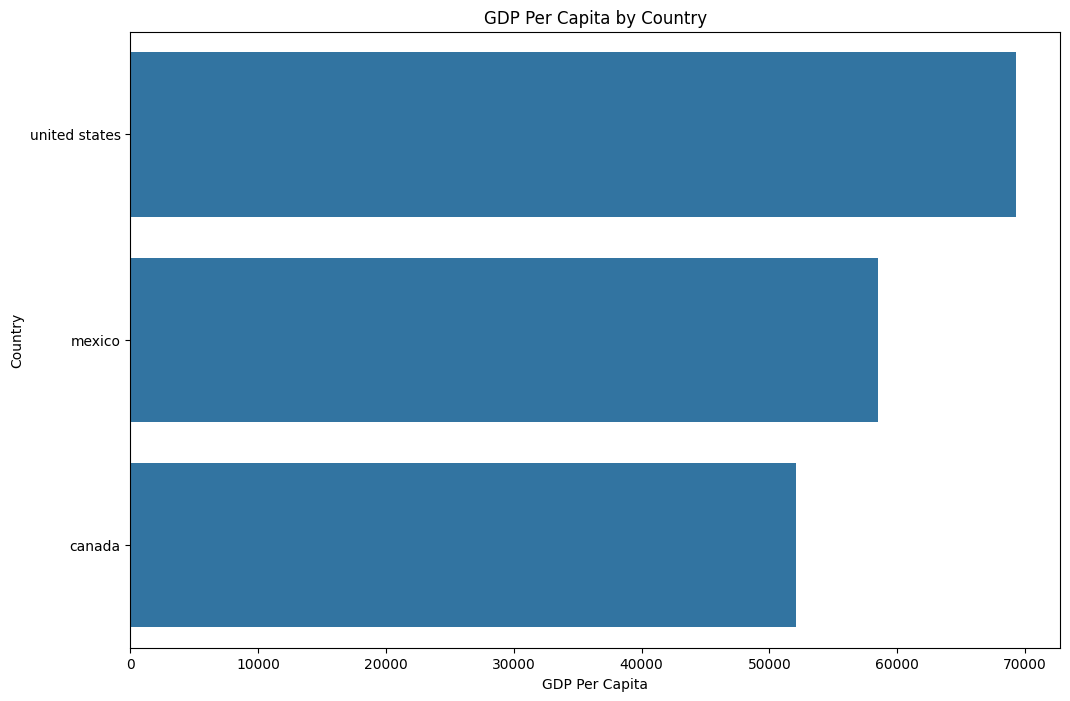

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

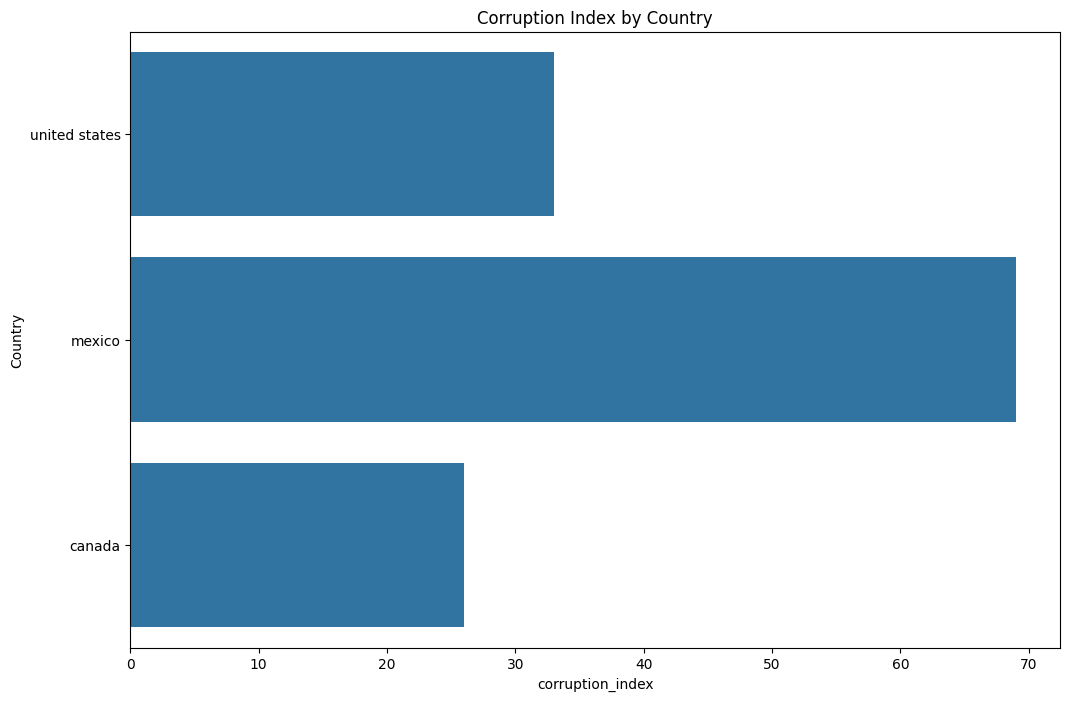

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

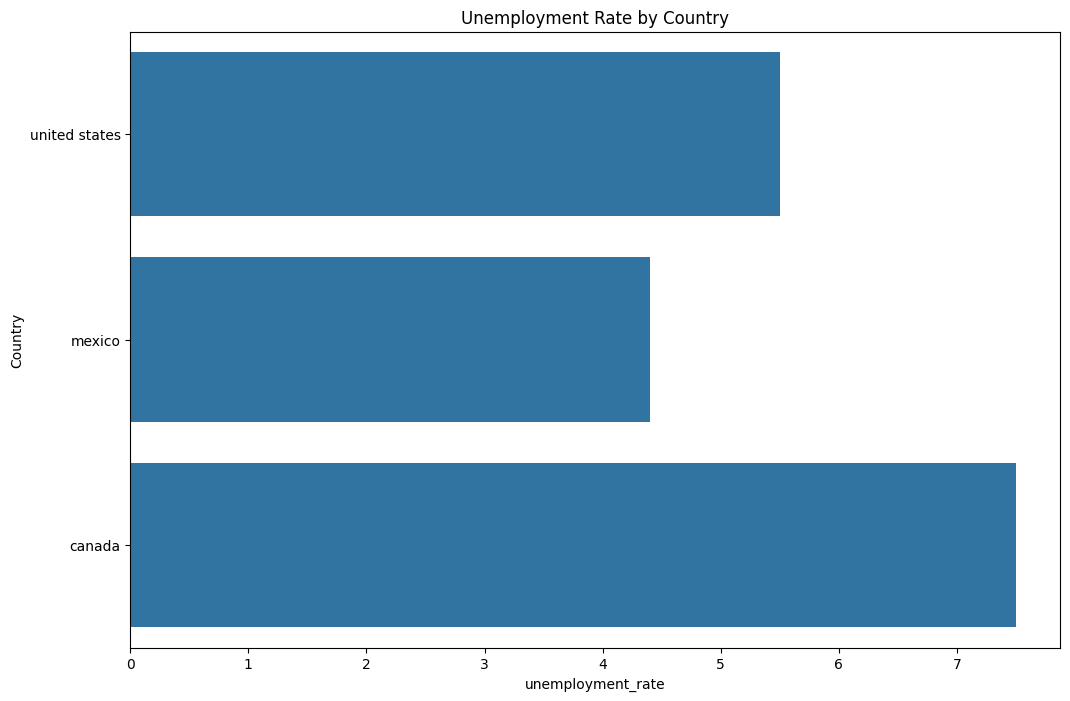

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot GDP per capita by country
plt.figure(figsize=(12, 8))
sns.barplot(x='gdp_per_capita', y='country', data=merged_gdf.sort_values('gdp_per_capita', ascending=False))
plt.title('GDP Per Capita by Country')
plt.xlabel('GDP Per Capita')
plt.ylabel('Country')
#plt.show()
plt.savefig("GDP Per Capita by Country.pdf", bbox_inches='tight')
files.download("GDP Per Capita by Country.pdf")
plt.show()

# Plot corruption_index by country
plt.figure(figsize=(12, 8))
sns.barplot(x='corruption_index', y='country', data=merged_gdf.sort_values('gdp_per_capita', ascending=False))
plt.title('Corruption Index by Country')
plt.xlabel('corruption_index')
plt.ylabel('Country')
#plt.show()
plt.savefig("Corruption Index by Country.pdf", bbox_inches='tight')
files.download("Corruption Index by Country.pdf")
plt.show()

# Plot unemployment_rate per capita by country
plt.figure(figsize=(12, 8))
sns.barplot(x='unemployment_rate', y='country', data=merged_gdf.sort_values('gdp_per_capita', ascending=False))
plt.title('Unemployment Rate by Country')
plt.xlabel('unemployment_rate')
plt.ylabel('Country')
#plt.show()
plt.savefig("Unemployment Rate by Country.pdf", bbox_inches='tight')
files.download("Unemployment Rate by Country.pdf")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

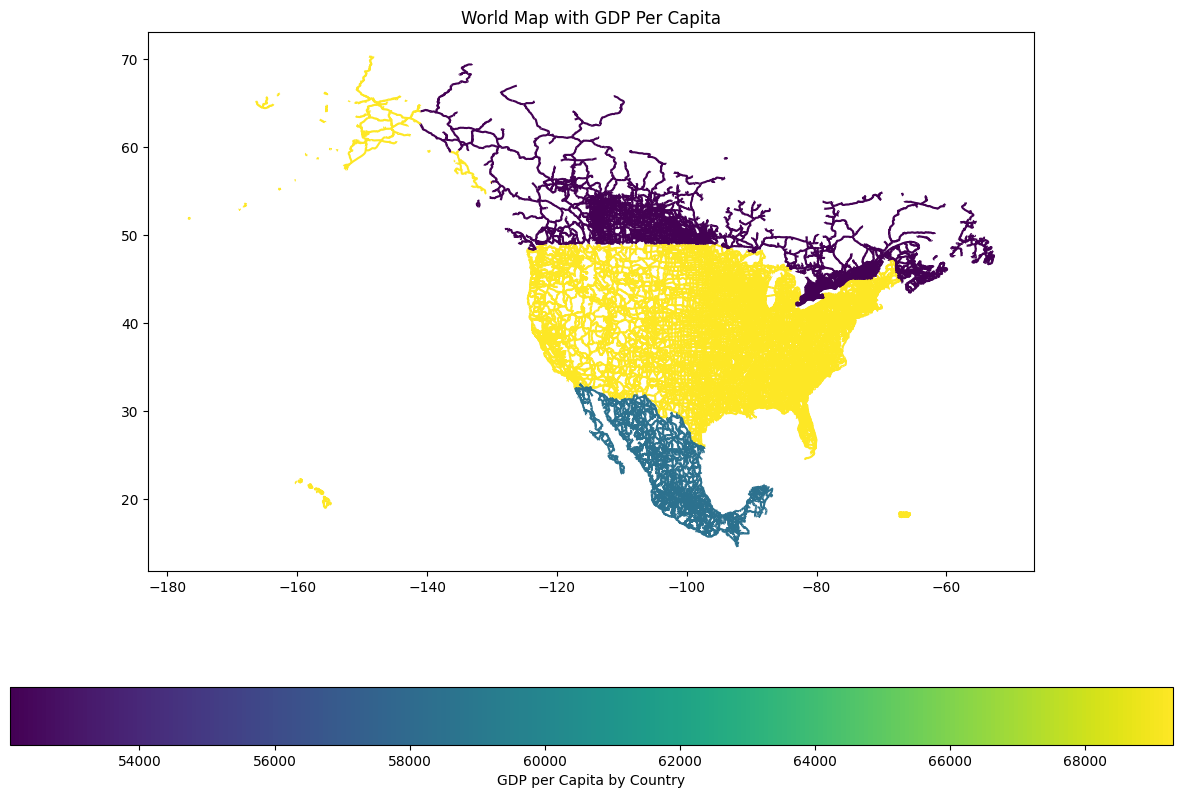

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

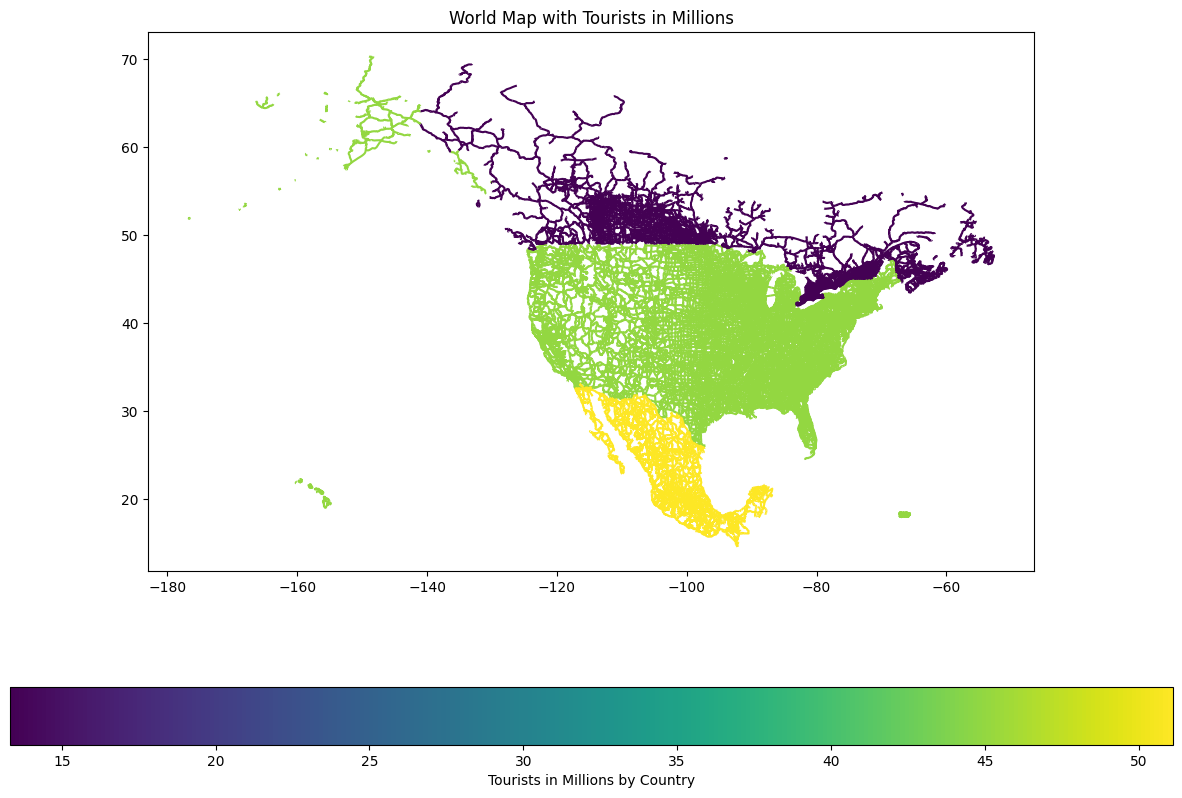

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

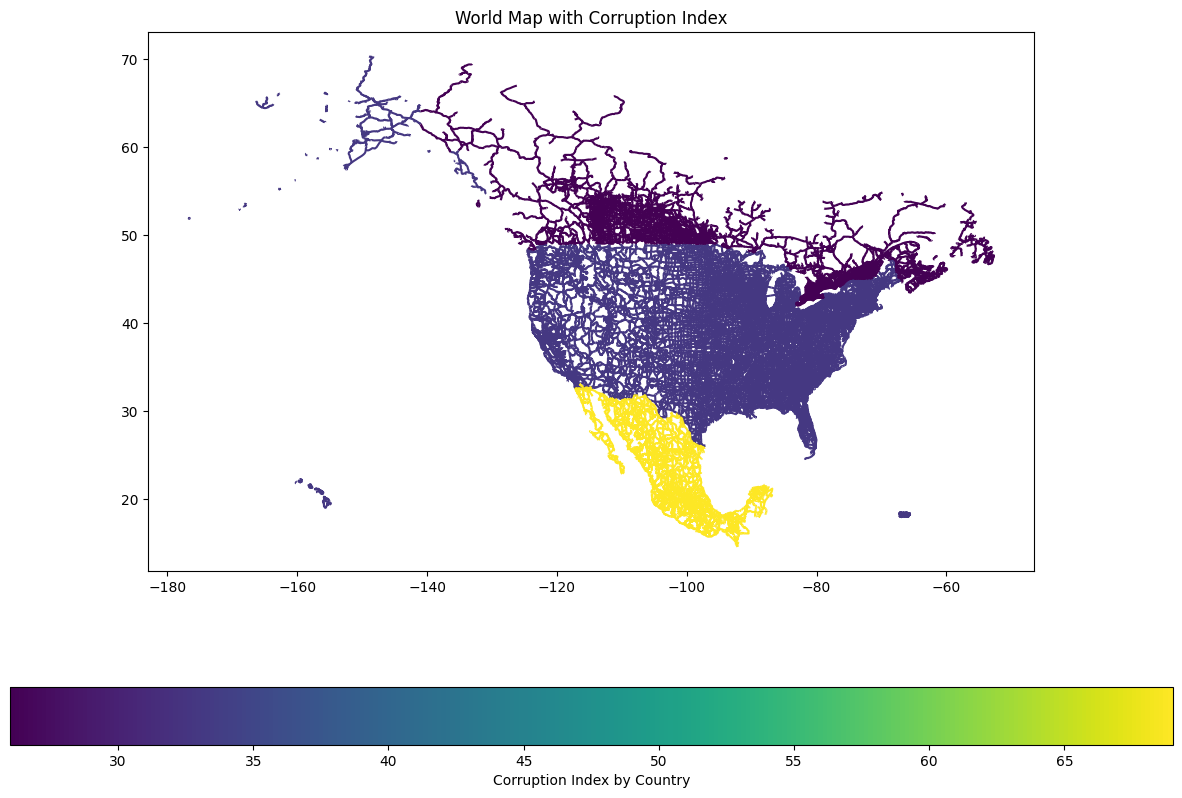

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

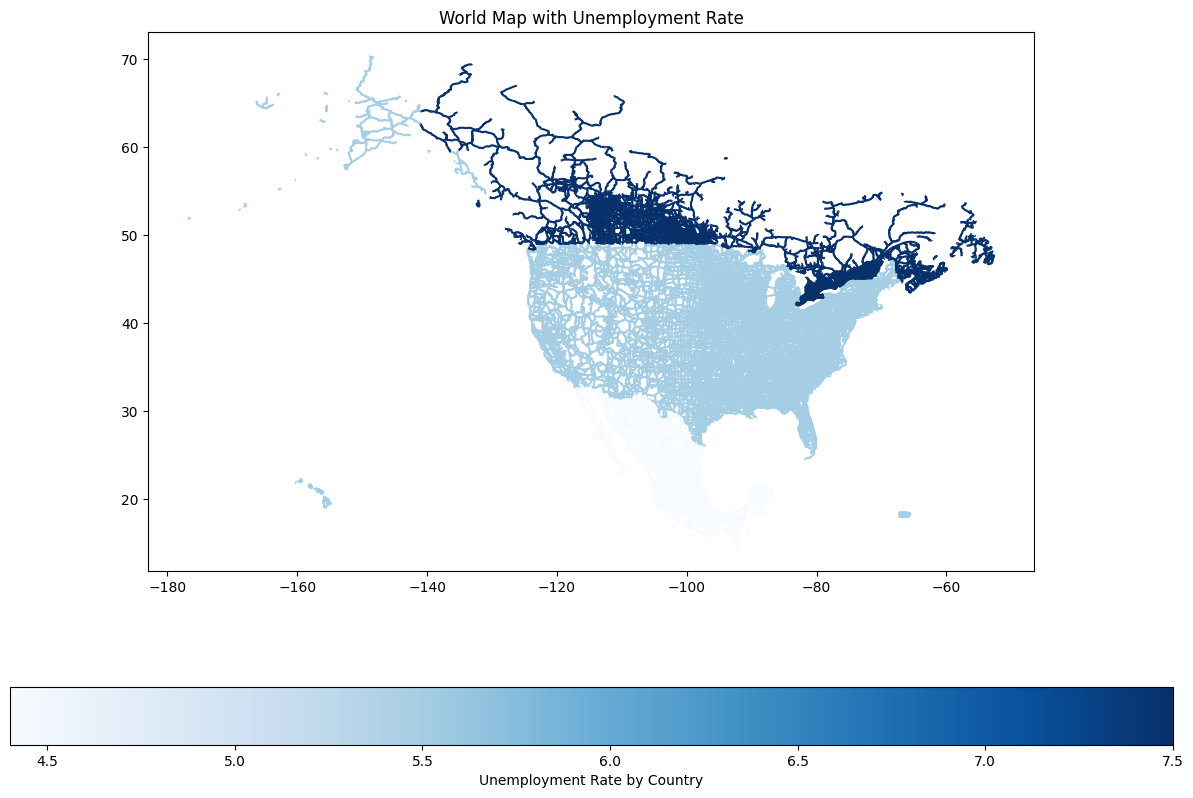

In [94]:
import geopandas as gpd

# Plot the GeoDataFrame with GDP per capita
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='gdp_per_capita', ax=ax, legend=True,
                legend_kwds={'label': "GDP per Capita by Country",
                             'orientation': "horizontal"})
plt.title('World Map with GDP Per Capita')
#plt.show()
plt.savefig("World Map with GDP Per Capita.pdf", bbox_inches='tight')
files.download("World Map with GDP Per Capita.pdf")
plt.show()

# Plot the GeoDataFrame with tourists_in_millions
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='tourists_in_millions', ax=ax, legend=True,
                legend_kwds={'label': "Tourists in Millions by Country",
                             'orientation': "horizontal"})
plt.title('World Map with Tourists in Millions')
#plt.show()
plt.savefig("World Map with Tourists in Millions.pdf", bbox_inches='tight')
files.download("World Map with Tourists in Millions.pdf")
plt.show()

# Plot the GeoDataFrame with corruption_index
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='corruption_index', ax=ax, legend=True,
                legend_kwds={'label': "Corruption Index by Country",
                             'orientation': "horizontal"})
plt.title('World Map with Corruption Index')
#plt.show()
plt.savefig("World Map with Corruption Index.pdf", bbox_inches='tight')
files.download("World Map with Corruption Index.pdf")
plt.show()

# Plotting the GeoDataFrame with unemployment rate
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='unemployment_rate', ax=ax, legend=True, cmap='Blues',
                legend_kwds={'label': "Unemployment Rate by Country",
                             'orientation': "horizontal"})
plt.title("World Map with Unemployment Rate")
#plt.show()
plt.savefig("World Map with Unemployment Rate.pdf", bbox_inches='tight')
files.download("World Map with Unemployment Rate.pdf")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

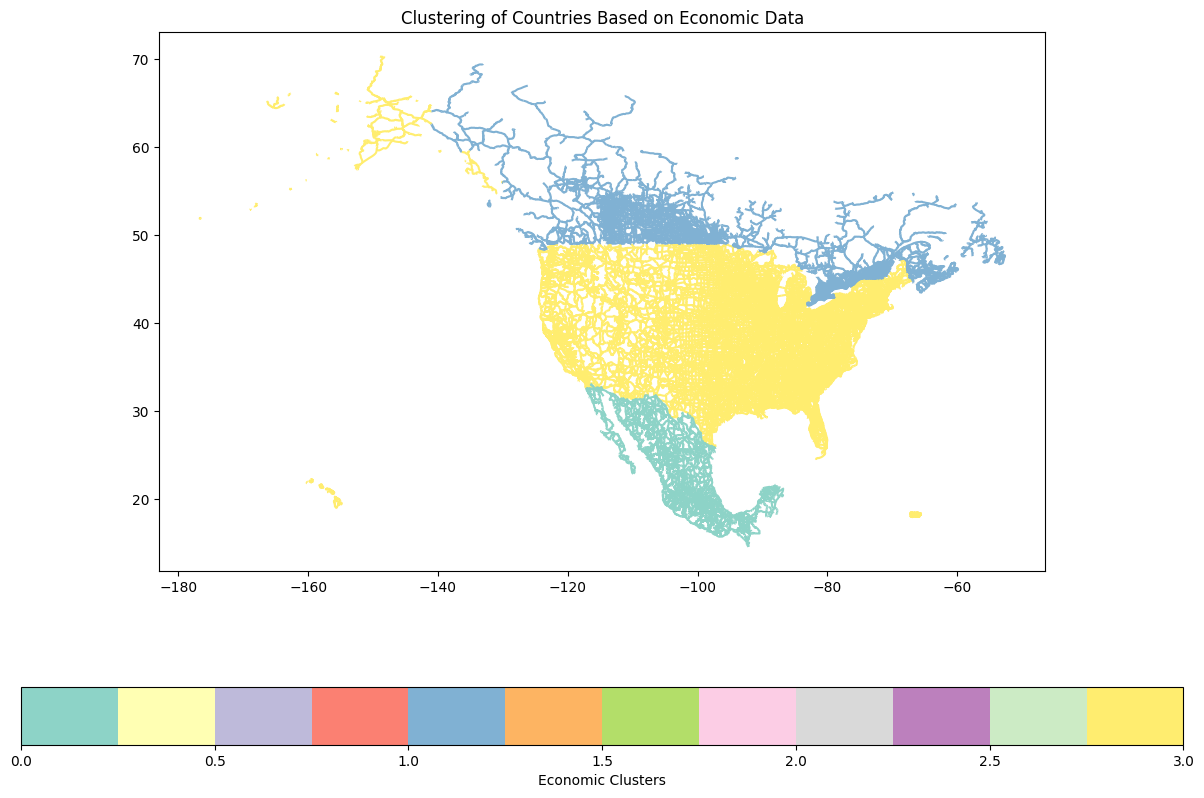

In [95]:
from sklearn.cluster import KMeans

# relevant columns for clustering
features = merged_gdf[['gdp_per_capita', 'annual_income', 'unemployment_rate']]

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5)
merged_gdf['cluster'] = kmeans.fit_predict(features)

# Visualize the clusters
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
merged_gdf.plot(column='cluster', ax=ax, legend=True, cmap='Set3',
                legend_kwds={'label': "Economic Clusters",
                             'orientation': "horizontal"})
plt.title("Clustering of Countries Based on Economic Data")
#plt.show()
plt.savefig("Clustering of Countries Based on Economic Data.pdf", bbox_inches='tight')
files.download("Clustering of Countries Based on Economic Data.pdf")
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

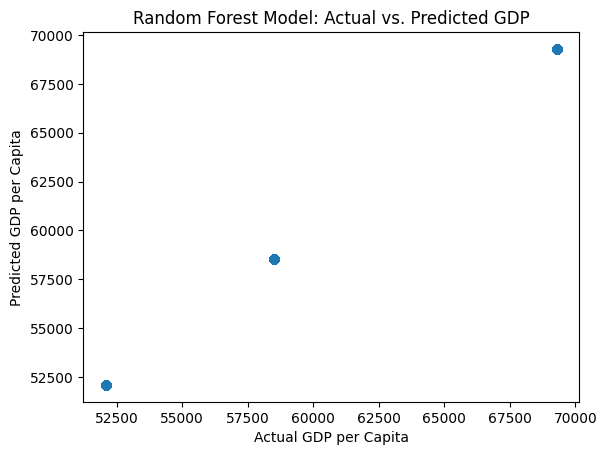

In [96]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Define features and target
X = merged_gdf[['annual_income', 'unemployment_rate', 'corruption_index']]
y = merged_gdf['gdp_per_capita']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Random Forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Visualize results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual GDP per Capita")
plt.ylabel("Predicted GDP per Capita")
plt.title("Random Forest Model: Actual vs. Predicted GDP")
#plt.show()
plt.savefig("Random Forest Model: Actual vs. Predicted GDP.pdf", bbox_inches='tight')
files.download("Random Forest Model: Actual vs. Predicted GDP.pdf")
plt.show()

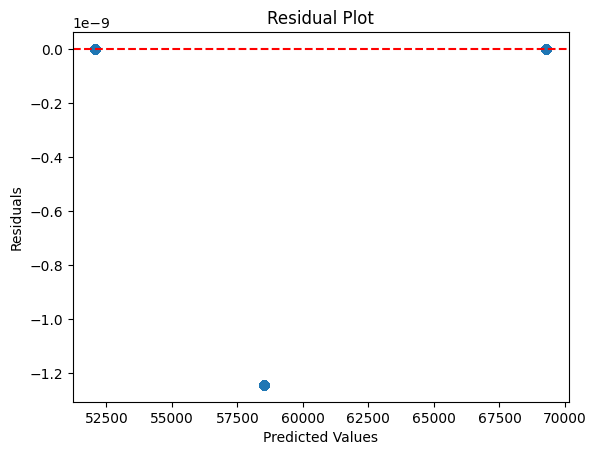

Mean Squared Error: 1.5818461402336243e-19


In [97]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Define features and target
X = merged_gdf[['annual_income', 'unemployment_rate', 'corruption_index']]
y = merged_gdf['gdp_per_capita']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = RandomForestRegressor()

# Fit the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate residuals (actual values minus predicted values for test set)
residuals = y_test - y_pred

# Plot residuals
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# Calculate and print the Mean Squared Error for evaluation
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Cross-Validation MSE Scores: [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.08706976e-21
 2.11168751e+08]
Mean Cross-Validation MSE: 42233750.20445393


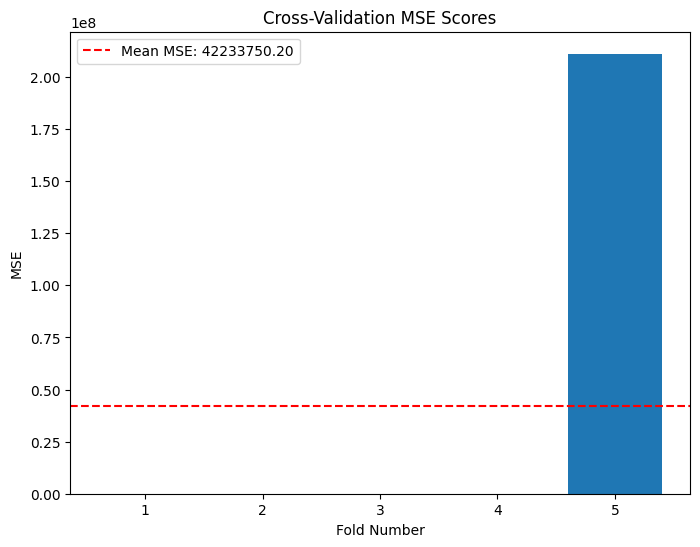

In [98]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, mean_squared_error

# Define MSE scorer
mse_scorer = make_scorer(mean_squared_error)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)

# Display the MSE for each fold and the mean
print("Cross-Validation MSE Scores:", cv_scores)
print("Mean Cross-Validation MSE:", cv_scores.mean())

# Plot cross-validation MSE scores
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(cv_scores) + 1), cv_scores)
plt.axhline(cv_scores.mean(), color='red', linestyle='--', label=f'Mean MSE: {cv_scores.mean():.2f}')
plt.xlabel('Fold Number')
plt.ylabel('MSE')
plt.title('Cross-Validation MSE Scores')
plt.legend()
plt.show()

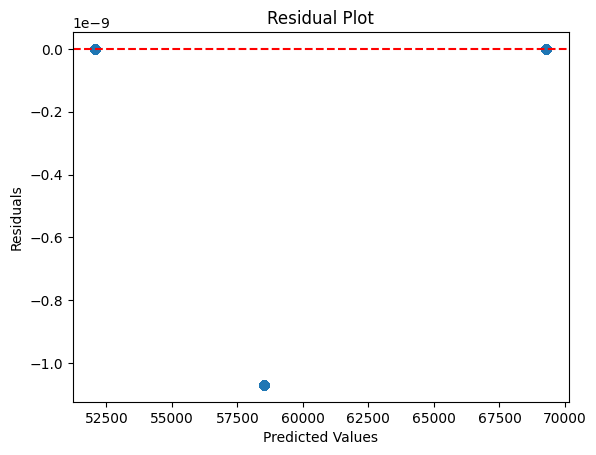

In [99]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Define the features and target
X = merged_gdf[['annual_income', 'unemployment_rate', 'corruption_index']]
y = merged_gdf['gdp_per_capita']

# Fit the scaler on the features (X) and transform them
X_scaled = scaler.fit_transform(X)

# Fit the model on the scaled data
model.fit(X_scaled, y)

# Make predictions
y_pred = model.predict(X_scaled)

# Calculate residuals
residuals = y - y_pred

# Plot residuals to check for patterns
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [100]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation on the scaled data
cv_scores_scaled = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive and print the results
cv_scores_scaled = -cv_scores_scaled
print("Cross-Validation MSE Scores (Scaled):", cv_scores_scaled)
print("Mean Cross-Validation MSE (Scaled):", cv_scores_scaled.mean())

Cross-Validation MSE Scores (Scaled): [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.08706976e-21
 2.11168751e+08]
Mean Cross-Validation MSE (Scaled): 42233750.20445393


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

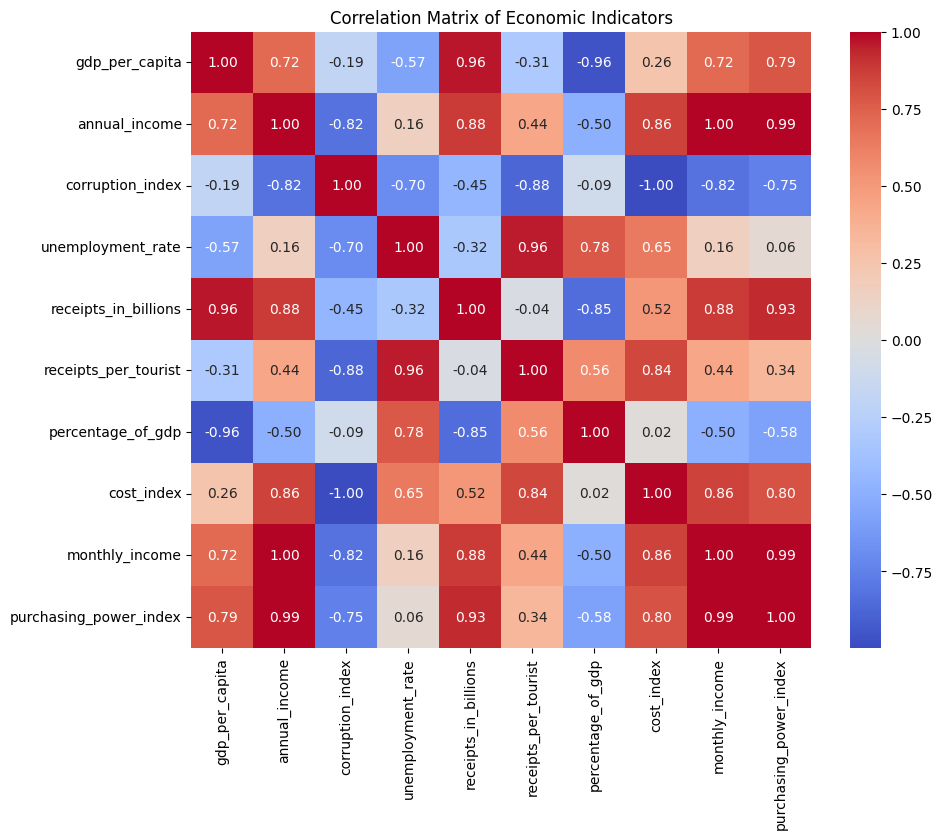

"Headers in combined_economic_df:\nIndex(['country', 'annual_income', 'corruption_index', 'unemployment_rate',\n       'gdp_per_capita', 'tourists_in_millions', 'receipts_in_billions',\n       'receipts_per_tourist', 'percentage_of_gdp', 'cost_index',\n       'monthly_income', 'purchasing_power_index'],\n      dtype='object')"

In [101]:
# Compute and visualize correlations
corr_matrix = merged_gdf[['gdp_per_capita', 'annual_income', 'corruption_index',
                          'unemployment_rate', 'receipts_in_billions', 'receipts_per_tourist',
                          'percentage_of_gdp', 'cost_index',
                          'monthly_income', 'purchasing_power_index']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Economic Indicators')
#plt.show()
plt.savefig("Correlation Matrix of Economic Indicators.pdf", bbox_inches='tight')
files.download("Correlation Matrix of Economic Indicators.pdf")
plt.show()


'''Headers in combined_economic_df:
Index(['country', 'annual_income', 'corruption_index', 'unemployment_rate',
       'gdp_per_capita', 'tourists_in_millions', 'receipts_in_billions',
       'receipts_per_tourist', 'percentage_of_gdp', 'cost_index',
       'monthly_income', 'purchasing_power_index'],
      dtype='object')'''

Mean Squared Error (XGBoost): 11812470.932799054


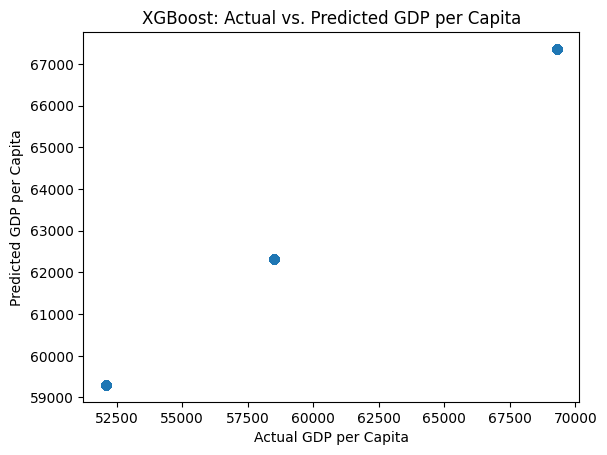

In [102]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Select features
X = merged_gdf[['annual_income', 'unemployment_rate', 'corruption_index', 'min_areakm', 'max_areakm']]
y = merged_gdf['gdp_per_capita']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', colsample_bytree=0.3, learning_rate=0.1, max_depth=5, alpha=10, n_estimators=10)
xg_reg.fit(X_train, y_train)

# Make predictions
y_pred = xg_reg.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (XGBoost): {mse}")

# Plotting Actual vs Predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("Actual GDP per Capita")
plt.ylabel("Predicted GDP per Capita")
plt.title("XGBoost: Actual vs. Predicted GDP per Capita")
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

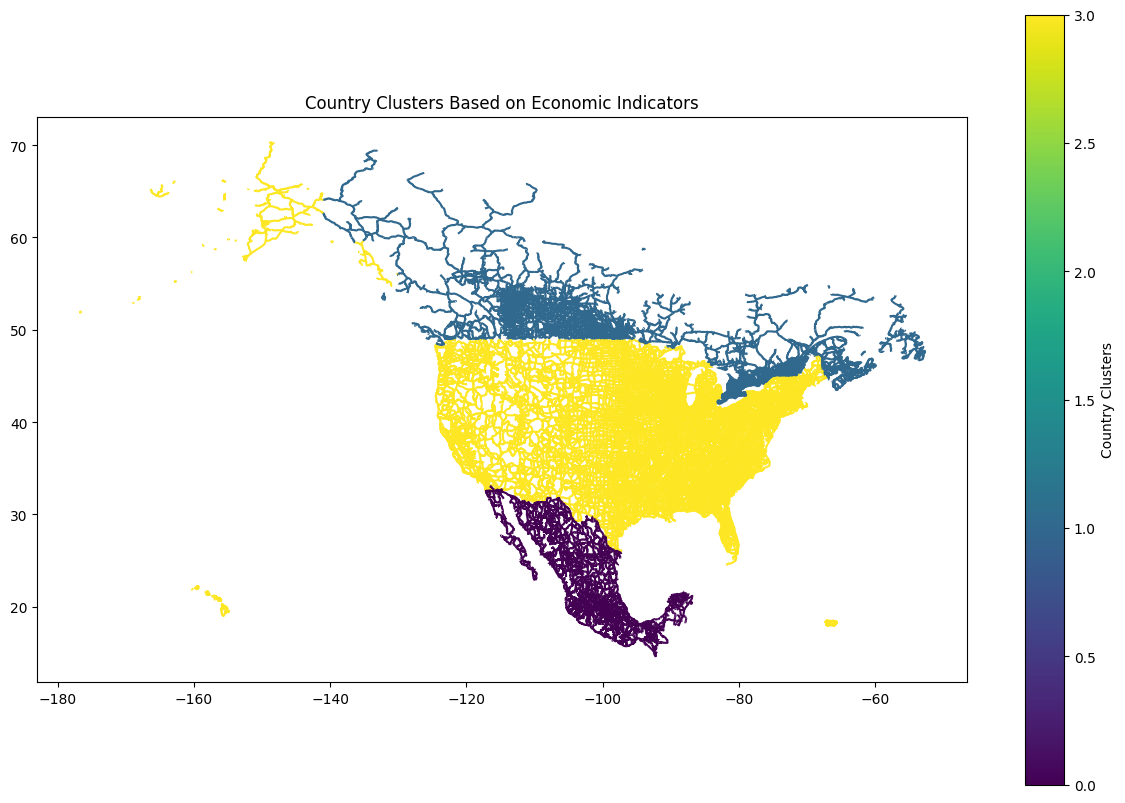

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return fit_method(estimator, *args, **kwargs)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

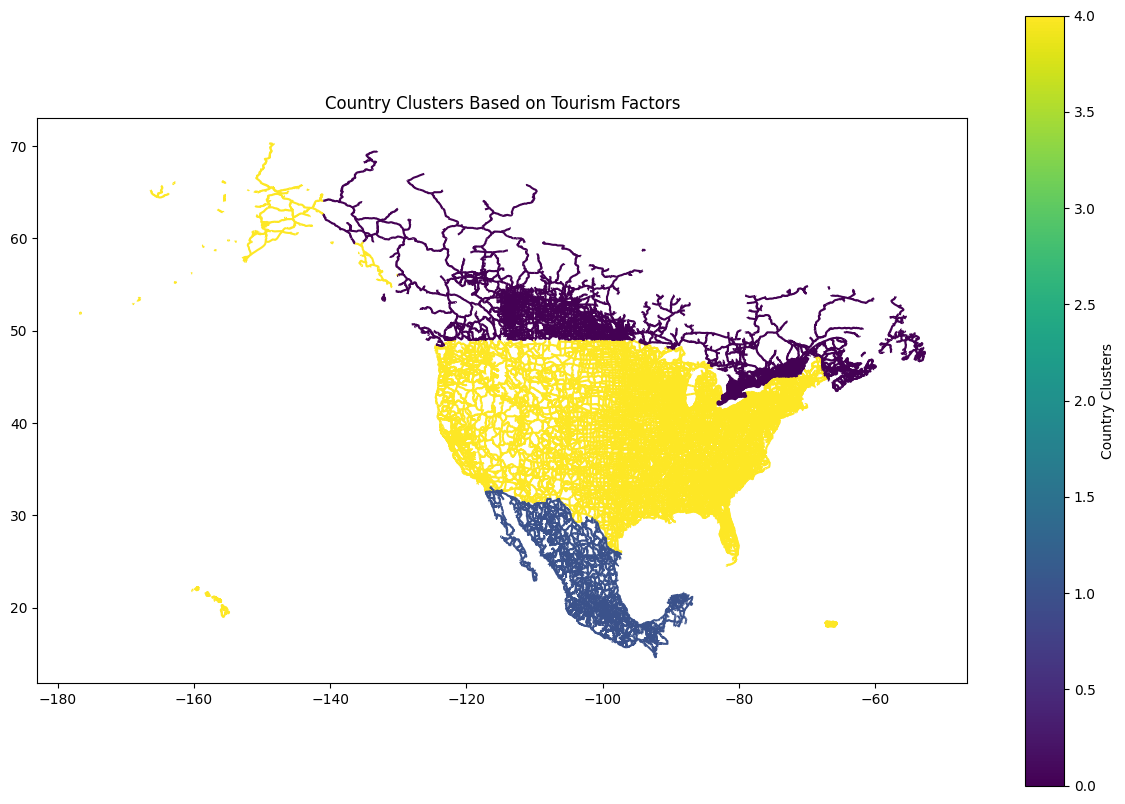

In [103]:
from sklearn.cluster import KMeans

# Define the number of clusters
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
merged_gdf['cluster'] = kmeans.fit_predict(merged_gdf[['gdp_per_capita', 'annual_income']])

# Visualize clusters
fig, ax = plt.subplots(figsize=(15, 10))
merged_gdf.plot(column='cluster', ax=ax, legend=True,
                legend_kwds={'label': "Country Clusters"})
plt.title('Country Clusters Based on Economic Indicators')
#plt.show()
plt.savefig("Country Clusters Based on Economic Indicators.pdf", bbox_inches='tight')
files.download("Country Clusters Based on Economic Indicators.pdf")
plt.show()

# Define the number of clusters
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters)
merged_gdf['cluster'] = kmeans.fit_predict(merged_gdf[['tourists_in_millions', 'receipts_in_billions',
       'receipts_per_tourist', 'percentage_of_gdp']])

# Visualize clusters
fig, ax = plt.subplots(figsize=(15, 10))
merged_gdf.plot(column='cluster', ax=ax, legend=True,
                legend_kwds={'label': "Country Clusters"})
plt.title('Country Clusters Based on Tourism Factors')
#plt.show()
plt.savefig("Country Clusters Based on Tourism Factors.pdf", bbox_inches='tight')
files.download("Country Clusters Based on Tourism Factors.pdf")
plt.show()